## Plot results of mutation detection experiments

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [16]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
# genes = ['TP53', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'mutation')
df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
0,0.76959,0.73168,TP53,signal,20,121958,nmf,train
1,0.79195,0.74256,TP53,signal,20,121958,nmf,test
2,0.76460,0.72502,TP53,signal,20,121958,nmf,cv
3,0.77387,0.73882,TP53,signal,20,259178,nmf,train
4,0.79278,0.75241,TP53,signal,20,259178,nmf,test
5,0.76953,0.73408,TP53,signal,20,259178,nmf,cv
6,0.77375,0.73867,TP53,signal,20,365838,nmf,train
7,0.79284,0.75205,TP53,signal,20,365838,nmf,test
8,0.76934,0.73380,TP53,signal,20,365838,nmf,cv
9,0.77357,0.73704,TP53,signal,20,671155,nmf,train


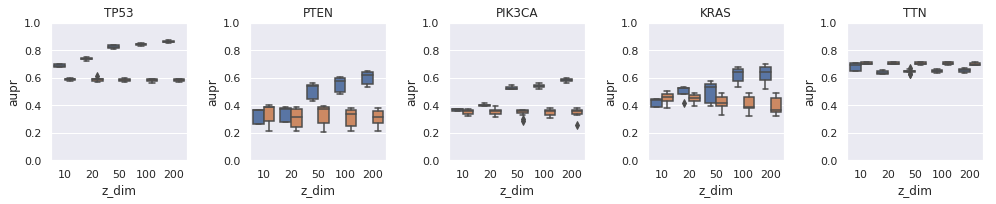

In [27]:
sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(14)
fig.set_figheight(3)
for ix, gene_name in enumerate(genes):
    ax = axarr[ix]
    gene_df = df[df['gene_or_cancertype'] == gene_name]
    sns.boxplot(data=gene_df, x='z_dim', y='aupr', hue='signal', ax=ax)
    ax.set_ylim((0.0, 1.0))
    ax.get_legend().remove()
    ax.set_title(gene_name)
plt.tight_layout()